<a href="https://colab.research.google.com/github/Ashi743/my_projects-/blob/main/AQLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [4]:
pollution_df= pd.read_csv("/content/gadm2_aqli_1998_2021.csv")
pollution_df.head()

,objectid_gadm2,iso_alpha3,country,name_1,name_2,population,whostandard,natstandard,pm1998,pm1999,...,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018,llpp_nat_2019,llpp_nat_2020,llpp_nat_2021
0,1,AFG,Afghanistan,Badakhshan,Baharak,95535.0,5,35.0,8.29,9.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,AFG,Afghanistan,Badakhshan,Darwaz,27665.0,5,35.0,8.19,8.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,AFG,Afghanistan,Badakhshan,Fayzabad,302299.0,5,35.0,7.83,8.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,AFG,Afghanistan,Badakhshan,Ishkashim,18326.0,5,35.0,8.20,9.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,AFG,Afghanistan,Badakhshan,Jurm,94396.0,5,35.0,8.28,9.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
world_gdf = gpd.read_file('/content/aqli_gadm2_final_june302023.shp')


In [6]:
pollution_df.columns

Index(['objectid_gadm2', 'iso_alpha3', 'country', 'name_1', 'name_2',
       'population', 'whostandard', 'natstandard', 'pm1998', 'pm1999',
       'pm2000', 'pm2001', 'pm2002', 'pm2003', 'pm2004', 'pm2005', 'pm2006',
       'pm2007', 'pm2008', 'pm2009', 'pm2010', 'pm2011', 'pm2012', 'pm2013',
       'pm2014', 'pm2015', 'pm2016', 'pm2017', 'pm2018', 'pm2019', 'pm2020',
       'pm2021', 'llpp_who_1998', 'llpp_who_1999', 'llpp_who_2000',
       'llpp_who_2001', 'llpp_who_2002', 'llpp_who_2003', 'llpp_who_2004',
       'llpp_who_2005', 'llpp_who_2006', 'llpp_who_2007', 'llpp_who_2008',
       'llpp_who_2009', 'llpp_who_2010', 'llpp_who_2011', 'llpp_who_2012',
       'llpp_who_2013', 'llpp_who_2014', 'llpp_who_2015', 'llpp_who_2016',
       'llpp_who_2017', 'llpp_who_2018', 'llpp_who_2019', 'llpp_who_2020',
       'llpp_who_2021', 'llpp_nat_1998', 'llpp_nat_1999', 'llpp_nat_2000',
       'llpp_nat_2001', 'llpp_nat_2002', 'llpp_nat_2003', 'llpp_nat_2004',
       'llpp_nat_2005', 'llpp_nat_2

**# 1.1  Count the GADM2 regions in India**

In [5]:
india_gadm2_count = pollution_df[pollution_df['country'] == 'India']['name_2'].nunique()
print(f"Number of GADM2 regions in India: {india_gadm2_count}")

Number of GADM2 regions in India: 684


**# 1.2 Population-weighted pollution average at country (GADM0) level**

In [7]:
def weighted_avg(df):
    weighted_values = df.iloc[:, 8:].mul(df['population'], axis=0).sum() / df['population'].sum()
    weighted_values['country'] = df['country'].iloc[0]
    return weighted_values.reset_index()


country_pollution = pollution_df.groupby(['country']).apply(weighted_avg)


<ipython-input-7-7877c952a1e9>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_pollution = pollution_df.groupby(['country']).apply(weighted_avg)


In [15]:
country_pollution.head()

index          0
country                         
Afghanistan 0  pm1998  10.883377
            1  pm1999  10.695073
            2  pm2000  11.882054
            3  pm2001  13.894024
            4  pm2002  13.579107

In [47]:
#save to csv
country_pollution.to_csv('country_level_pollution.csv', index=False)

In [9]:
# 10 most polluted countries in 2021
pm2021_data = country_pollution[country_pollution['index'] == 'pm2021']
top_ten_values = pm2021_data.sort_values(by=0, ascending=False).head(10)
top_ten_values


,,index,0
country,,,
Bangladesh,23,pm2021,73.957984
India,23,pm2021,58.70153
Nepal,23,pm2021,51.713215
Pakistan,23,pm2021,44.732405
Mongolia,23,pm2021,36.039302
Myanmar,23,pm2021,34.979832
Democratic Republic of the Congo,23,pm2021,34.643665
Republic of the Congo,23,pm2021,32.409004
Rwanda,23,pm2021,32.356333


**# 1.3 Most polluted GADM2 region in 1998, 2005, 2021**

In [49]:
for year in [1998, 2005, 2021]:
    year_col = f'pm{year}'
    most_polluted_region = pollution_df.loc[pollution_df[year_col].idxmax(), ['name_2', 'country', year_col]]
    print(f"Most polluted GADM2 region in {year}: {most_polluted_region.values}")


Most polluted GADM2 region in 1998: ['Unnao' 'India' 78.55]
Most polluted GADM2 region in 2005: ['NCT of Delhi' 'India' 98.75]
Most polluted GADM2 region in 2021: ['NCT of Delhi' 'India' 126.51]


**# 1.4 Trendline plot for Uttar Pradesh (1998-2021)**

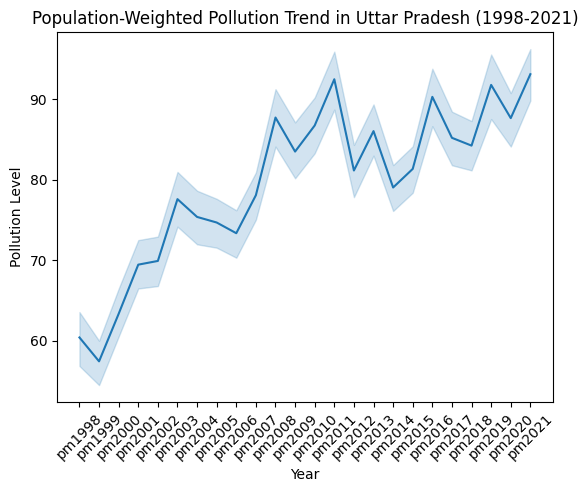

In [65]:
up_trend = pollution_df[(pollution_df['country'] == 'India') & (pollution_df['name_1'] == 'Uttar Pradesh')]
sns.lineplot(data=up_trend.melt(id_vars=['name_2'], value_vars=[f'pm{year}' for year in range(1998, 2022)]), x='variable', y='value')
plt.title("Population-Weighted Pollution Trend in Uttar Pradesh (1998-2021)")
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.xticks(rotation=45)
plt.savefig('up_trend.png', dpi=300)
plt.show()

**# 2.1 Life Years Lost Analysis (Bar Graph & Map)**

In [7]:
pollution_df['LLP_WHO'] = pollution_df[[f'llpp_who_{year}' for year in range(1998, 2022)]].sum(axis=1)
top_10_lyl = pollution_df.groupby('country')['LLP_WHO'].sum().nlargest(10).reset_index()


<ipython-input-5-19114e8f26e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_lyl, x='LLP_WHO', y='country', palette='Reds')


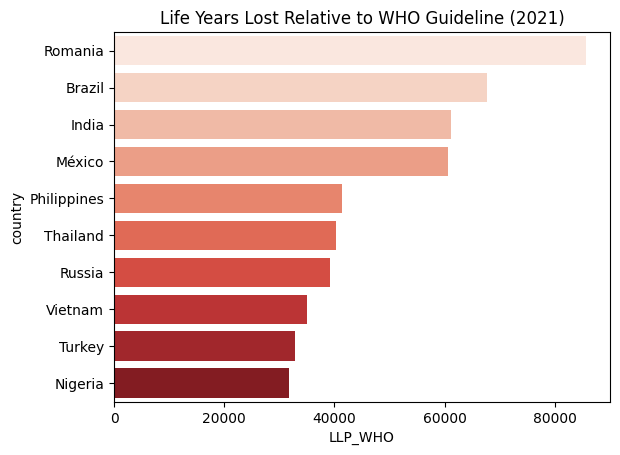

In [5]:
sns.barplot(data=top_10_lyl, x='LLP_WHO', y='country', palette='Reds')
plt.title("Life Years Lost Relative to WHO Guideline (2021)")
plt.savefig('lyl_bar.png', dpi=300)
plt.show()

In [25]:
# Ensure country names are consistent
top_10_countries = top_10_lyl['country'].unique()

# Filter world_gdf for only the top 10 polluted countries
filtered_gdf = world_gdf[world_gdf['name0'].isin(top_10_countries)][['name0', 'name1', 'name2', 'geometry']]



In [21]:
# Merge filtered_gdf (spatial data) with top_10_lyl (pollution data)
merged_gdf = filtered_gdf.merge(top_10_lyl, left_on='name0', right_on='country', how='left')

# Drop duplicate 'country' column after merging
merged_gdf.drop(columns=['country'], inplace=True)

# Display result
merged_gdf.head()

# Save if needed
#merged_gdf.to_file("top_10_polluted_regions.geojson", driver="GeoJSON")  # Saves as a GeoJSON file for mapping


,name0,name1,name2,geometry,LLP_WHO
0,Brazil,Acre,Acrelândia,"MULTIPOLYGON (((-67.00087 -10.22907, -67.00163...",67651.0
1,Brazil,Acre,Assis Brasil,"POLYGON ((-69.57415 -10.94523, -69.57451 -10.9...",67651.0
2,Brazil,Acre,Brasiléia,"POLYGON ((-69.41283 -10.93708, -69.41289 -10.9...",67651.0
3,Brazil,Acre,Bujari,"POLYGON ((-67.97684 -9.35273, -67.97684 -9.352...",67651.0
4,Brazil,Acre,Capixaba,"MULTIPOLYGON (((-67.57861 -10.50274, -67.57927...",67651.0


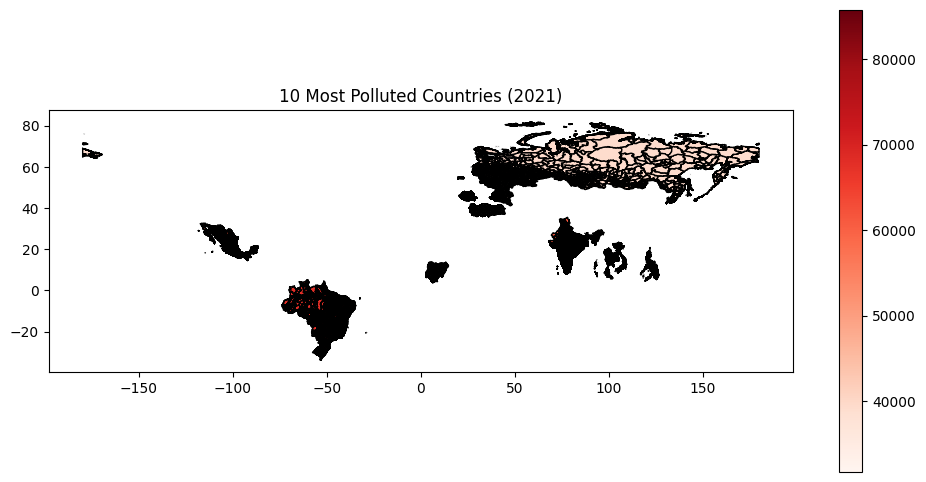

In [22]:

fig, ax = plt.subplots(figsize=(12, 6))
merged_gdf.plot(column='LLP_WHO', cmap='Reds', legend=True, edgecolor='black', ax=ax)
plt.title("10 Most Polluted Countries (2021)")
plt.savefig('lyl_map.png', dpi=300)
plt.show()


due to memory loading issues just viualized the polluted countries only rather visualizing the entire world map.


**# 2.2 Potential Gain in Life Expectancy Map (Eastern vs Western Europe)**

In [8]:
europe_gdf= world_gdf.copy()
polluted_europe= pollution_df.copy()

In [9]:
eastern_countries = ["POL", "HUN", "CZE", "SVK", "RUS", "UKR", "BLR", "ROU", "BGR", "MDA", "LTU", "LVA", "EST", "ALB", "MKD", "SRB", "MNE", "BIH", "HRV", "SVN"]
western_countries = ["AUT", "BEL", "DNK", "FIN", "FRA", "DEU", "GRC", "ISL", "IRL", "ITA", "LUX", "MLT", "NLD", "NOR", "PRT", "ESP", "SWE", "CHE", "GBR"]

total_europe= eastern_countries + western_countries
len(total_europe)

39

In [10]:
polluted_europe = pollution_df[pollution_df['iso_alpha3'].isin(total_europe)][['country', 'iso_alpha3', 'LLP_WHO']]
polluted_europe['iso_alpha3'].nunique()

39

In [11]:
polluted_europe

,country,iso_alpha3,LLP_WHO
343,Albania,ALB,25.35
344,Albania,ALB,26.69
345,Albania,ALB,22.00
346,Albania,ALB,26.53
347,Albania,ALB,32.38
...,...,...,...
43024,United Kingdom,GBR,21.04
43025,United Kingdom,GBR,12.92
43026,United Kingdom,GBR,22.09
43027,United Kingdom,GBR,19.45


In [15]:
polluted_europe.columns


Index(['country', 'iso_alpha3', 'LLP_WHO'], dtype='object')

In [16]:
europe_gdf.columns

Index(['obidgadm2', 'name0', 'name1', 'name2', 'geometry'], dtype='object')

In [13]:
# Merge pollution data with European shapefile
europe_gdf1= europe_gdf.merge(polluted_europe, left_on='name0', right_on='country', how='left')

europe_gdf1 = europe_gdf1[['name0', 'name1', 'name2', 'geometry', 'iso_alpha3', 'LLP_WHO']]

# Assign region labels
europe_gdf1['region'] = europe_gdf1['iso_alpha3'].apply(lambda x: 'East' if x in eastern_countries else 'West')


In [14]:
europe_gdf1

,name0,name1,name2,geometry,iso_alpha3,LLP_WHO,region
0,Afghanistan,Badakhshan,Baharak,"POLYGON ((71.41149 36.55717, 71.40954 36.55237...",NaN,NaN,West
1,Afghanistan,Badakhshan,Darwaz,"POLYGON ((71.2762 38.00465, 71.27578 38.00471,...",NaN,NaN,West
2,Afghanistan,Badakhshan,Fayzabad,"POLYGON ((70.78272 37.27678, 70.78635 37.27388...",NaN,NaN,West
3,Afghanistan,Badakhshan,Ishkashim,"POLYGON ((71.41149 36.55717, 71.40091 36.56163...",NaN,NaN,West
4,Afghanistan,Badakhshan,Jurm,"POLYGON ((70.71236 37.07621, 70.73582 37.06548...",NaN,NaN,West
...,...,...,...,...,...,...,...
16553498,Zimbabwe,Midlands,Redcliff,"POLYGON ((29.69907 -19.00888, 29.71847 -19.004...",NaN,NaN,West
16553499,Zimbabwe,Midlands,Shurugwi,"POLYGON ((29.8756 -20.0057, 29.87369 -20.00481...",NaN,NaN,West
16553500,Zimbabwe,Midlands,Shurugwi Town,"POLYGON ((30.05583 -19.69895, 30.05583 -19.699...",NaN,NaN,West
16553501,Zimbabwe,Midlands,Zvishavane,"POLYGON ((30.37508 -20.44078, 30.37532 -20.440...",NaN,NaN,West


In [51]:
europe_merge

,obidgadm2,name0,name1,name2,geometry,country,iso_alpha3,LLP_WHO
0,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,25.35
1,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,26.69
2,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,22.00
3,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,26.53
4,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,32.38
...,...,...,...,...,...,...,...,...
16516813,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",United Kingdom,GBR,21.04
16516814,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",United Kingdom,GBR,12.92
16516815,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",United Kingdom,GBR,22.09
16516816,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",United Kingdom,GBR,19.45


In [43]:
europe_gdf

,obidgadm2,name0,name1,name2,geometry
343,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,..."
344,345,Albania,Berat,Kuçovës,"POLYGON ((19.96408 40.85664, 19.96338 40.85128..."
345,346,Albania,Berat,Skraparit,"POLYGON ((20.36911 40.42555, 20.3705 40.41808,..."
346,347,Albania,Dibër,Bulqizës,"POLYGON ((20.54619 41.42509, 20.54888 41.42147..."
347,348,Albania,Dibër,Dibrës,"POLYGON ((20.42978 41.5569, 20.42501 41.56383,..."
...,...,...,...,...,...
43024,43080,United Kingdom,Wales,"Rhondda, Cynon, Taff","POLYGON ((-3.57142 51.68555, -3.57222 51.69083..."
43025,43081,United Kingdom,Wales,Swansea,"MULTIPOLYGON (((-4.32417 51.56625, -4.32417 51..."
43026,43082,United Kingdom,Wales,Torfaen,"POLYGON ((-3.13107 51.70694, -3.13223 51.71112..."
43027,43083,United Kingdom,Wales,Vale of Glamorgan,"MULTIPOLYGON (((-3.10472 51.34153, -3.10472 51..."


In [19]:
world_gd

,obidgadm2,name0,name1,name2,geometry
0,1,Afghanistan,Badakhshan,Baharak,"POLYGON ((71.41149 36.55717, 71.40954 36.55237..."
1,2,Afghanistan,Badakhshan,Darwaz,"POLYGON ((71.2762 38.00465, 71.27578 38.00471,..."
2,3,Afghanistan,Badakhshan,Fayzabad,"POLYGON ((70.78272 37.27678, 70.78635 37.27388..."
3,4,Afghanistan,Badakhshan,Ishkashim,"POLYGON ((71.41149 36.55717, 71.40091 36.56163..."
4,5,Afghanistan,Badakhshan,Jurm,"POLYGON ((70.71236 37.07621, 70.73582 37.06548..."
...,...,...,...,...,...
48150,48208,Zimbabwe,Midlands,Redcliff,"POLYGON ((29.69907 -19.00888, 29.71847 -19.004..."
48151,48209,Zimbabwe,Midlands,Shurugwi,"POLYGON ((29.8756 -20.0057, 29.87369 -20.00481..."
48152,48210,Zimbabwe,Midlands,Shurugwi Town,"POLYGON ((30.05583 -19.69895, 30.05583 -19.699..."
48153,48211,Zimbabwe,Midlands,Zvishavane,"POLYGON ((30.37508 -20.44078, 30.37532 -20.440..."


In [21]:
polluted_europe

,objectid_gadm2,iso_alpha3,country,name_1,name_2,population,whostandard,natstandard,pm1998,pm1999,...,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018,llpp_nat_2019,llpp_nat_2020,llpp_nat_2021,LLP_WHO
0,1,AFG,Afghanistan,Badakhshan,Baharak,95535.0,5,35.0,8.29,9.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.97
1,2,AFG,Afghanistan,Badakhshan,Darwaz,27665.0,5,35.0,8.19,8.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.95
2,3,AFG,Afghanistan,Badakhshan,Fayzabad,302299.0,5,35.0,7.83,8.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.72
3,4,AFG,Afghanistan,Badakhshan,Ishkashim,18326.0,5,35.0,8.20,9.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.73
4,5,AFG,Afghanistan,Badakhshan,Jurm,94396.0,5,35.0,8.28,9.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48150,48208,ZWE,Zimbabwe,Midlands,Redcliff,40794.0,5,NaN,15.34,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.37
48151,48209,ZWE,Zimbabwe,Midlands,Shurugwi,88020.0,5,NaN,16.30,14.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.21
48152,48210,ZWE,Zimbabwe,Midlands,Shurugwi Town,24930.0,5,NaN,15.00,13.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.52
48153,48211,ZWE,Zimbabwe,Midlands,Zvishavane,82142.0,5,NaN,15.54,12.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.15


In [34]:
eastern_countries = ["POL", "HUN", "CZE", "SVK", "RUS", "UKR", "BLR", "ROU", "BGR", "MDA", "LTU", "LVA", "EST", "ALB", "MKD", "SRB", "MNE", "BIH", "HRV", "SVN"]

polluted_europe

KeyError: 'iso_alpha3'

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from matplotlib.colors import ListedColormap


# Define Eastern and Western European countries (Source: Wikipedia)
eastern_countries = ["POL", "HUN", "CZE", "SVK", "RUS", "UKR", "BLR", "ROU", "BGR", "MDA", "LTU", "LVA", "EST", "ALB", "MKD", "SRB", "MNE", "BIH", "HRV", "SVN"]
western_countries = ["AUT", "BEL", "DNK", "FIN", "FRA", "DEU", "GRC", "ISL", "IRL", "ITA", "LUX", "MLT", "NLD", "NOR", "PRT", "ESP", "SWE", "CHE", "GBR"]

# Create a new DataFrame for pollution data filtered by selected European countries
europe_pollution_df = pollution_df[pollution_df['iso_alpha3'].isin(eastern_countries + western_countries)][['country', 'iso_alpha3', 'LLP_WHO']]

# Filter European countries from world_gdf
europe_gdf = world_gdf[world_gdf['name0'].isin(europe_pollution_df['country'])]

# Merge pollution data with European shapefile
europe_gdf = europe_gdf.merge(europe_pollution_df, left_on='name0', right_on='country', how='left')

# Assign region labels
europe_gdf['region'] = europe_gdf['iso_alpha3'].apply(lambda x: 'East' if x in eastern_countries else 'West')

# Define color scale based on AQLI legend
colors = ["#FEE5D9", "#FC9272", "#DE2D26", "#A50F15"]
cmap = ListedColormap(colors)


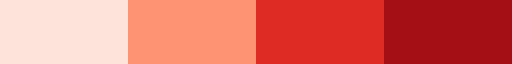

In [17]:
cmap

In [13]:
europe_gdf.head()

,obidgadm2,name0,name1,name2,geometry,country,iso_alpha3,LLP_WHO,region
0,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,25.35,East
1,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,26.69,East
2,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,22.00,East
3,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,26.53,East
4,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,32.38,East


In [16]:
europe_gdf['region'].value_counts()

,count
region,
East,15721946
West,794872


KeyboardInterrupt: 

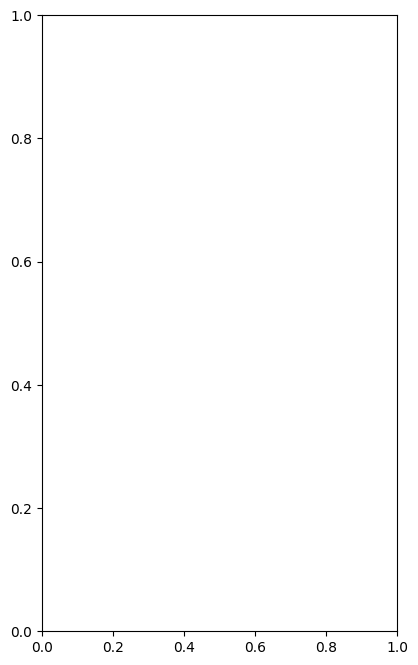

In [15]:

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
europe_gdf.plot(column='LLP_WHO', cmap=cmap, legend=True, edgecolor='black', ax=ax)
plt.title("Potential Gain in Life Expectancy - Eastern vs. Western Europe (GADM Level 2)")

# Add annotations
east_label = "Eastern Europe (Red)"
west_label = "Western Europe (Blue)"
plt.text(-10, 70, east_label, color='red', fontsize=12, weight='bold')
plt.text(-10, 65, west_label, color='blue', fontsize=12, weight='bold')

# Save as high-quality PDF
#plt.savefig("europe_life_expectancy.pdf", dpi=300, format='pdf')
plt.show()

In [37]:
europe_gdf

,obidgadm2,name0,name1,name2,geometry,country,iso_alpha3,LLP_WHO,region
0,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,25.35,East
1,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,26.69,East
2,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,22.00,East
3,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,26.53,East
4,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",Albania,ALB,32.38,East
...,...,...,...,...,...,...,...,...,...
16516813,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",United Kingdom,GBR,21.04,West
16516814,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",United Kingdom,GBR,12.92,West
16516815,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",United Kingdom,GBR,22.09,West
16516816,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",United Kingdom,GBR,19.45,West


In [ ]:
from matplotlib.colors import ListedColormap

# Define color scale based on AQLI legend
colors = ["#FEE5D9", "#FC9272", "#DE2D26", "#A50F15"]
cmap = ListedColormap(colors)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
europe_gdf.plot(column='LLP_WHO', cmap=cmap, legend=True, edgecolor='black', ax=ax)
plt.title("Potential Gain in Life Expectancy - Eastern vs. Western Europe (GADM Level 2)")

# Add annotations
east_label = "Eastern Europe (Red)"
west_label = "Western Europe (Blue)"
plt.text(-10, 70, east_label, color='red', fontsize=12, weight='bold')
plt.text(-10, 65, west_label, color='blue', fontsize=12, weight='bold')

# Save as high-quality PDF
plt.savefig("europe_life_expectancy.pdf", dpi=300, format='pdf')
plt.show()

In [31]:
eastern_countries = ["POL", "HUN", "CZE", "SVK", "RUS", "UKR", "BLR", "ROU", "BGR", "MDA", "LTU", "LVA", "EST", "ALB", "MKD", "SRB", "MNE", "BIH", "HRV", "SVN"]
for countries in eastern_countries:
  if countries  not in pollution_df['iso_alpha3'].unique():
    print(countries)

In [28]:
pollution_df['iso_alpha3'].unique()

array(['AFG', 'XAD', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA',
       'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR',
       'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL',
       'BES', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'VGB', 'BRN', 'BGR',
       'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD',
       'CHL', 'CHN', 'CXR', 'XCL', 'CCK', 'COL', 'COM', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH',
       'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP',
       'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HMD', 'HND',
       'HUN', 'ISL', 'IND', 'Z01', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN',
       'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR',
       'XKO', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY',
       'LIE', 'LTU',

In [7]:
world_gdf

,obidgadm2,name0,name1,name2,geometry
0,1,Afghanistan,Badakhshan,Baharak,"POLYGON ((71.41149 36.55717, 71.40954 36.55237..."
1,2,Afghanistan,Badakhshan,Darwaz,"POLYGON ((71.2762 38.00465, 71.27578 38.00471,..."
2,3,Afghanistan,Badakhshan,Fayzabad,"POLYGON ((70.78272 37.27678, 70.78635 37.27388..."
3,4,Afghanistan,Badakhshan,Ishkashim,"POLYGON ((71.41149 36.55717, 71.40091 36.56163..."
4,5,Afghanistan,Badakhshan,Jurm,"POLYGON ((70.71236 37.07621, 70.73582 37.06548..."
...,...,...,...,...,...
48150,48208,Zimbabwe,Midlands,Redcliff,"POLYGON ((29.69907 -19.00888, 29.71847 -19.004..."
48151,48209,Zimbabwe,Midlands,Shurugwi,"POLYGON ((29.8756 -20.0057, 29.87369 -20.00481..."
48152,48210,Zimbabwe,Midlands,Shurugwi Town,"POLYGON ((30.05583 -19.69895, 30.05583 -19.699..."
48153,48211,Zimbabwe,Midlands,Zvishavane,"POLYGON ((30.37508 -20.44078, 30.37532 -20.440..."


**# 2.3 Global Pollution Map (AQLI Colors)**

In [ ]:
aqli_colors = 'coolwarm'  # Replace with exact colors from AQLI site
fig, ax = plt.subplots(figsize=(12, 6))
world_gdf.plot(column='pm2021', cmap=aqli_colors, legend=True, edgecolor='black', ax=ax)
plt.title("Global Air Pollution Map (2021)")
plt.savefig('global_pollution.svg', dpi=320)
plt.show()
